# Fast Fourier Transform using `numpy`

This notebook introduces how to perform Fast Fourier Transform (FFT) properly with the `numpy.fft` module.  
**Author:** Bill Chen  
**Created:** July 2022  
**Last modified:** July 2022  
**License:** MIT  
**Modules:**
```
python = 3.8.3
numpy = 1.18.5
matplotlib = 3.4.3
```

## The `numpy.fft` module

In `numpy.fft`, DFT from real space to phase space is defined as (see [here](https://numpy.org/doc/stable/reference/routines.fft.html)):

$$
\tilde{a}_f = \sum_{m=0}^{N-1}a_m e^{-2\pi i fx_m}
$$

where $x_m=m\Delta x$, and $\Delta x$ is the sampling interval in real space. Let's compare it with the continuous FT:

$$
\tilde{a}(f) = {\cal F}\{a(x)\}(f) = \int a(x) e^{-2\pi i fx}dx
$$

Normally, this is discretized as

$$
\tilde{a}(f) = {\cal F}\{a(x)\}(f) \simeq \sum_{m=0}^{N-1} a_m e^{-2\pi i fx_m}\Delta x = \tilde{a}_f\Delta x
$$

Therefore, there is a $\Delta x$ difference in the normalization between `numpy.fft` and continuous FT.

Moreover, `numpy.fft` defines DFT from phase space to real space as

$$
a_m = \frac{1}{N}\sum_{k=0}^{N-1}\tilde{a}_k e^{2\pi i f_kx_m}
$$

where $f_k=k\Delta f$, and $\Delta f$ is the sampling interval in phase space. However, the continuous inverse FT is

$$
a(x) = {\cal F}^{-1}\{\tilde{a}(f)\}(x) = \int \tilde{a}(f) e^{2\pi i fx}df
$$


Normally, this is discretized as

$$
a(x) = {\cal F}^{-1}\{\tilde{a}(f)\}(x) \simeq \sum_{k=0}^{N-1} \tilde{a}_k e^{2\pi i f_kx_m}\Delta f 
= a_mN\Delta f
$$

Therefore, there is an $N\Delta f$ difference in the normalization between `numpy.fft.ifft` and continuous inverse FT.

## Basic usage: 1D case

**Real space to phase space**

Tophat function $\rm rect(x)$ as an example:

$$
{\cal F}\{rect(x)\}(f) = \frac{\sin(\pi f)}{\pi f} = {\rm sinc}(f)
$$

Here, $\rm sinc$ is the same definition as `numpy.sinc`. Note that the below FFT result is not exactly the same as the $\rm sinc$ function due to under-sampling.

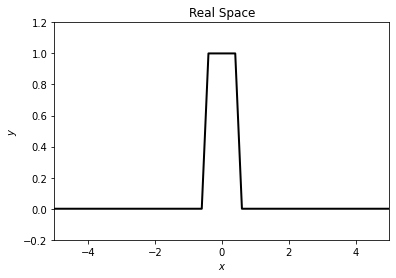

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xmin = -5
xmax = 5
N = 100+1 # better be (xmax - xmin)^2, for comparable real space and k-space range

x = np.linspace(xmin, xmax, N)
y = np.heaviside(0.5-np.abs(x),0.5) # tophat, corresponding to square pulse wave

fig, ax0 = plt.subplots(1, 1, figsize=(6,4))

ax0.plot(x, y, c='k', lw=2)

ax0.set_title(r'Real Space')
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$y$')
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(-0.2, 1.2)

plt.show()

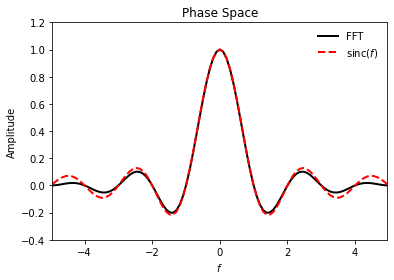

In [2]:
y_shift = np.fft.ifftshift(y) # important! This centralizes the pattern

dx = x[1] - x[0] # sampling interval
sp = np.fft.fft(y_shift) * dx # need to multiply dx as FT is integral not summation
f = np.fft.fftfreq(N, dx)

sp = np.fft.fftshift(sp) # not necessarily, but for better plot
f = np.fft.fftshift(f)

fmax = np.max(f)
fmin = np.min(f)

# make lot

fig, ax0 = plt.subplots(1, 1, figsize=(6,4))

ax0.plot(f, sp.real, c='k', lw=2, label=r'FFT')
ax0.plot(f, np.sinc(f), c='r', lw=2, ls='--', label=r'${\rm sinc}(f)$')

ax0.set_title(r'Phase Space')
ax0.set_xlabel(r'$f$')
ax0.set_ylabel(r'Amplitude')
ax0.set_xlim(fmin, fmax)
ax0.set_ylim(-0.4, 1.2)
ax0.legend(frameon=False)

plt.show()

**Phase space to real space**

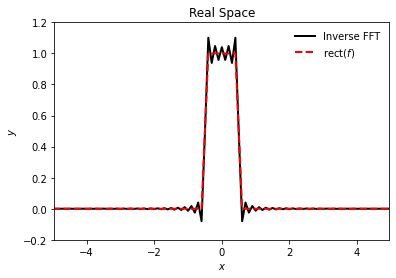

In [3]:
amp = np.sinc(f)
amp_shift = np.fft.ifftshift(amp) # important! This centralizes the pattern

df = f[1] - f[0] # sampling interval
sp = np.fft.ifft(amp_shift) * N * df # need to multiply N and df according to numpy.fft.ifft
x = np.fft.fftfreq(N, df)

sp = np.fft.fftshift(sp) # not necessarily, but for better plot
x = np.fft.fftshift(x)

xmax = np.max(x)
xmin = np.min(x)

# make lot

fig, ax0 = plt.subplots(1, 1, figsize=(6,4))

ax0.plot(x, sp.real, c='k', lw=2, label=r'Inverse FFT')
ax0.plot(x, y, c='r', lw=2, ls='--', label=r'${\rm rect}(f)$')

ax0.set_title(r'Real Space')
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$y$')
ax0.set_xlim(fmin, fmax)
ax0.set_ylim(-0.2, 1.2)
ax0.legend(frameon=False)

plt.show()

## Basic usage: 2D case

Rectangular slit as an example.

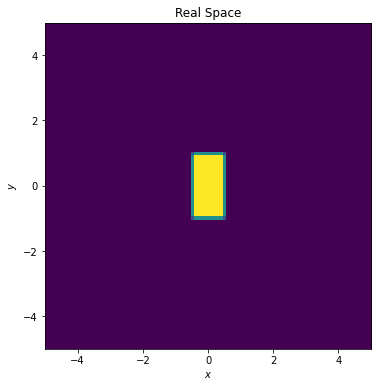

In [4]:
xmin = -5
xmax = 5
ymin = -5
ymax = 5
N = 100+1

slit_width = 1
slit_height = 2

x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
xx, yy = np.meshgrid(x, y)

# tophat function again, but 2D
zz = np.heaviside(slit_width/2-np.abs(xx),0.5) * np.heaviside(slit_height/2-np.abs(yy),0.5) 

fig, ax0 = plt.subplots(1, 1, figsize=(6,6))

ax0.imshow(zz, origin='lower', extent=(xmin,xmax,ymin,ymax))

ax0.set_title(r'Real Space')
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$y$')
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)

plt.show()

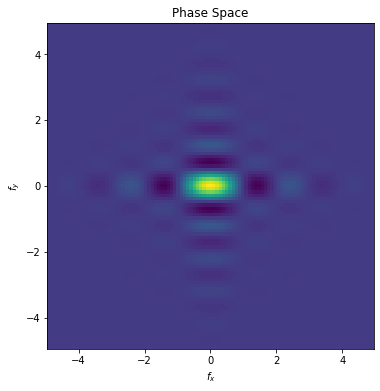

In [5]:
zz_shift = np.fft.ifftshift(zz) # important! This centralizes the pattern

dx = x[1] - x[0] # sampling interval
dy = y[1] - y[0]

sp = np.fft.fftn(zz_shift) * dx * dy # need to multiply dx*dy as FT is integral not summation
fx = np.fft.fftfreq(N, dx)
fy = np.fft.fftfreq(N, dy)

sp = np.fft.fftshift(sp) # necessary here if using imshow
fx = np.fft.fftshift(fx)
fy = np.fft.fftshift(fy)

fxmax = np.max(fx)
fxmin = np.min(fx)
fymax = np.max(fy)
fymin = np.min(fy)

# make lot

fig, ax0 = plt.subplots(1, 1, figsize=(6,6))

ax0.imshow(sp.real, origin='lower', extent=(fxmin,fxmax,fymin,fymax))

ax0.set_title(r'Phase Space')
ax0.set_xlabel(r'$f_x$')
ax0.set_ylabel(r'$f_y$')
ax0.set_xlim(fxmin, fxmax)
ax0.set_ylim(fymin, fymax)

plt.show()

## Application: Fraunhofer diffraction

Fraunhofer diffraction can be described as 2D FFT. Considering:

- Incoming plane wave $\lambda$
- Distance to image plane $D$
- Aperture shape $A(x',y')$

Then, the image pattern is

$$
U(x,y) \propto \iint A(x',y')\exp\left[-\frac{2\pi i}{\lambda D}(xx'+yy')\right]dx'dy'
$$

Therefore, 

$$
U(x,y) \propto {\cal F}\{A(x',y')\}\left(\frac{x}{\lambda D}, \frac{y}{\lambda D}\right)
$$

And the intensity is $I(x,y)\propto|U(x,y)|^2$.

Using the double-slit experiment as an example:

- $\lambda=500\ {\rm nm}$ (green-blue light)
- $D=2\ {\rm m}$
- Slit size $=2\ {\rm mm}\times 0.2\ {\rm mm}$
- Slit seperation $=1\ {\rm mm}$

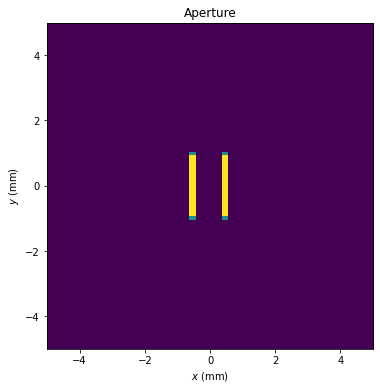

In [6]:
xmin = -5
xmax = 5
ymin = -5
ymax = 5
N = 100+1

# Aperture geometry, all units are mm
wavelength = 500e-6
D = 2e3
slit_width = 0.2
slit_height = 2
slit_seperation = 1

x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
xx, yy = np.meshgrid(x, y)

# tophat function again, but 2D
zz = (
    np.heaviside(slit_width/2-np.abs(xx-slit_seperation/2),0.5) * 
        np.heaviside(slit_height/2-np.abs(yy),0.5) +
    np.heaviside(slit_width/2-np.abs(xx+slit_seperation/2),0.5) * 
        np.heaviside(slit_height/2-np.abs(yy),0.5))

fig, ax0 = plt.subplots(1, 1, figsize=(6,6))

ax0.imshow(zz, origin='lower', extent=(xmin,xmax,ymin,ymax))

ax0.set_title(r'Aperture')
ax0.set_xlabel(r'$x\ ({\rm mm})$')
ax0.set_ylabel(r'$y\ ({\rm mm})$')
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)

plt.show()

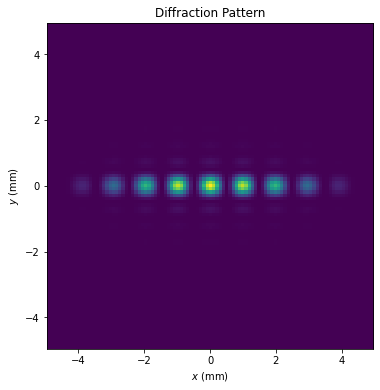

In [7]:
zz_shift = np.fft.ifftshift(zz) # important! This centralizes the pattern

dx = x[1] - x[0] # sampling interval
dy = y[1] - y[0]

sp = np.fft.fftn(zz_shift) * dx * dy # need to multiply dx*dy as FT is integral not summation
fx = np.fft.fftfreq(N, dx)
fy = np.fft.fftfreq(N, dy)

sp = np.fft.fftshift(sp) # necessary here if using imshow
fx = np.fft.fftshift(fx)
fy = np.fft.fftshift(fy)
x_image = fx * wavelength * D # in mm
y_image = fy * wavelength * D # in mm

x_image_max = np.max(x_image)
x_image_min = np.min(x_image)
y_image_max = np.max(y_image)
y_image_min = np.min(y_image)

# make lot

fig, ax0 = plt.subplots(1, 1, figsize=(6,6))

# plot the intensity
ax0.imshow(np.abs(sp)**2, origin='lower', 
    extent=(x_image_min,x_image_max,y_image_min,y_image_max))

ax0.set_title(r'Diffraction Pattern')
ax0.set_xlabel(r'$x\ ({\rm mm})$')
ax0.set_ylabel(r'$y\ ({\rm mm})$')
ax0.set_xlim(x_image_min, x_image_max)
ax0.set_ylim(y_image_min, y_image_max)

plt.show()